In [5]:
import pandas as pd

# Load the uploaded CSV file into a DataFrame (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('Battery_RUL.csv')
print(df.head())  # Print the first few rows to verify the data


   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0            1             2595.30             1151.488500   
1            2             7408.64             1172.512500   
2            3             7393.76             1112.992000   
3            4             7385.50             1080.320667   
4            6            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10500.35  1111  
2 

In [ ]:
# Assuming the 'RUL' column is the target variable (Remaining Useful Life)
X = df.drop(columns=['RUL'])  # Features
y = df['RUL']  # Target

# Optionally normalize or scale the data (use MinMaxScaler or StandardScaler)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # Check shapes of the splits


(12051, 8) (3013, 8) (12051,) (3013,)


In [36]:
y_test

8692     1043
4489      956
8163      469
13837     176
7709      943
         ... 
4783      645
12314     632
8962      772
5981      491
1042       33
Name: RUL, Length: 3013, dtype: int64

Iteration 0, Normalized MSE: 0.32222102568856215
Iteration 100, Normalized MSE: 0.08118921858774839
Iteration 200, Normalized MSE: 0.08118921858774839
Iteration 300, Normalized MSE: 0.08118921858774839
Iteration 400, Normalized MSE: 0.08118921858774839
Iteration 500, Normalized MSE: 0.08118921858774839
Iteration 600, Normalized MSE: 0.08118921858774839
Iteration 700, Normalized MSE: 0.08118921858774839
Iteration 800, Normalized MSE: 0.08118921858774839
Iteration 900, Normalized MSE: 0.08118921858774839


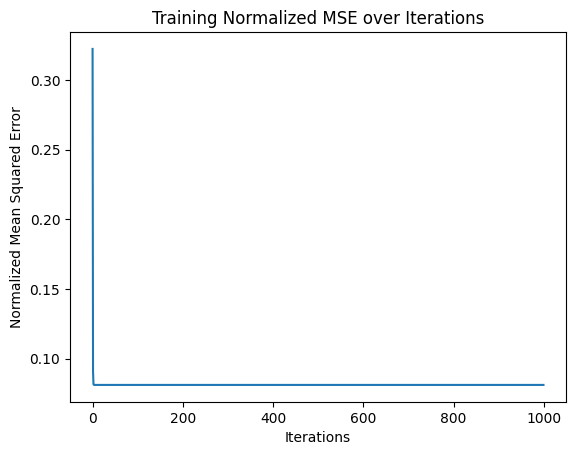

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Redefine FeedForwardNN class with 3 hidden layers
class FeedForwardNN:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, learning_rate=0.000001):
        self.learning_rate = learning_rate
        
        # Initialize weights and biases for 3 hidden layers
        self.W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size1))
        
        self.W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        
        self.W3 = np.random.randn(hidden_size2, hidden_size3) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((1, hidden_size3))
        
        self.W4 = np.random.randn(hidden_size3, output_size) * np.sqrt(2. / hidden_size3)
        self.b4 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def forward(self, X):
        # Forward pass through 3 hidden layers
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)  # ReLU activation for first hidden layer
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)  # ReLU activation for second hidden layer
        
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.relu(self.Z3)  # ReLU activation for third hidden layer
        
        self.Z4 = np.dot(self.A3, self.W4) + self.b4
        self.output = self.Z4  # No activation for output (linear)
        
        return self.output

    def backward(self, X, y):
        # Backpropagation through 3 hidden layers
        output_error = y - self.output
        output_delta = output_error  # No activation derivative for output layer

        A3_error = output_delta.dot(self.W4.T)
        A3_delta = A3_error * self.relu_derivative(self.A3)  # ReLU derivative for third hidden layer

        A2_error = A3_delta.dot(self.W3.T)
        A2_delta = A2_error * self.relu_derivative(self.A2)  # ReLU derivative for second hidden layer

        A1_error = A2_delta.dot(self.W2.T)
        A1_delta = A1_error * self.relu_derivative(self.A1)  # ReLU derivative for first hidden layer

        # Gradient clipping to avoid exploding gradients
        max_grad_norm = 1.0  # Set a maximum gradient norm
        grad_norm = np.linalg.norm(A1_delta)
        if grad_norm > max_grad_norm:
            A1_delta = A1_delta * (max_grad_norm / grad_norm)

        # Update weights and biases for each layer
        self.W4 += self.A3.T.dot(output_delta) * self.learning_rate
        self.b4 += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        
        self.W3 += self.A2.T.dot(A3_delta) * self.learning_rate
        self.b3 += np.sum(A3_delta, axis=0, keepdims=True) * self.learning_rate
        
        self.W2 += self.A1.T.dot(A2_delta) * self.learning_rate
        self.b2 += np.sum(A2_delta, axis=0, keepdims=True) * self.learning_rate
        
        self.W1 += X.T.dot(A1_delta) * self.learning_rate
        self.b1 += np.sum(A1_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, iterations):
        mse_history = []
        for i in range(iterations):
            self.forward(X)
            self.backward(X, y)  # y should already be reshaped (n_samples, 1)
            
            mse = np.mean(np.square(y - self.output))  # Compute Mean Squared Error

            # Normalize MSE
            mse_normalized = mse  # Normalize by the range of the target variable

            # Avoid NaN by checking MSE
            if np.isnan(mse) or np.isinf(mse):
                print(f"NaN or Inf encountered at iteration {i}. Stopping training.")
                break

            mse_history.append(mse_normalized)
            if i % 100 == 0:
                print(f"Iteration {i}, Normalized MSE: {mse_normalized}")
        
        return mse_history

    def predict(self, X):
        return self.forward(X)

# Fix parameters for hidden sizes and learning rate
fixed_hidden_size1 = 3  # Fixed number of neurons in the first hidden layer
fixed_hidden_size2 = 2  # Fixed number of neurons in the second hidden layer
fixed_hidden_size3 = 1  # Fixed number of neurons in the third hidden layer
fixed_learning_rate = 1e-4  # Fixed learning rate

# Scale the target variable (RUL) to ensure MSE stays within a reasonable range
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))  # Ensure y_train is reshaped

# Initialize and train the neural network with fixed hyperparameters
nn = FeedForwardNN(input_size=X_train.shape[1], 
                   hidden_size1=fixed_hidden_size1, 
                   hidden_size2=fixed_hidden_size2, 
                   hidden_size3=fixed_hidden_size3, 
                   output_size=1, 
                   learning_rate=fixed_learning_rate)

# Train the network and capture the normalized MSE history
mse_history = nn.train(X_train, y_train_scaled, iterations=1000)

# Plot normalized MSE over iterations
plt.plot(mse_history)
plt.xlabel('Iterations')
plt.ylabel('Normalized Mean Squared Error')
plt.title('Training Normalized MSE over Iterations')
plt.show()

# You can now use the trained model to make predictions on test data
y_pred_scaled = nn.predict(X_test)

# To unscale the predictions back to original RUL values, use the inverse transform
y_pred = scaler.inverse_transform(y_pred_scaled)


[0.92137809] [0.4909499]


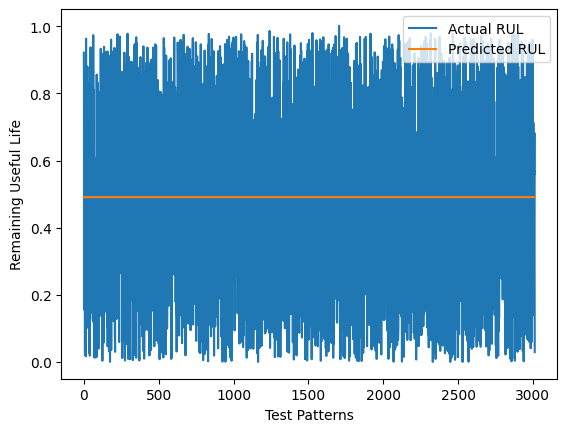

Mean Square Error: 0.08088386855577023


In [20]:
# Make predictions on the test set
predictions = nn.predict(X_test)

y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

print(y_test_scaled[0], y_pred_scaled[0])
# Plot predicted vs actual RUL values
plt.plot(y_test_scaled, label='Actual RUL')
plt.plot(y_pred_scaled, label='Predicted RUL')
plt.xlabel('Test Patterns')
plt.ylabel('Remaining Useful Life')
plt.legend()
plt.show()

# Calculate error between predicted and actual RUL
error = y_test_scaled - y_pred_scaled
print(f"Mean Square Error: {np.mean(np.square(error))}")


In [35]:
# Save predictions to a CSV file
predictions_df = pd.DataFrame(predictions, columns=['Predicted RUL'])
predictions_df.to_csv('predictions.csv', index=False)


# Add the 'allow_pickle=True' argument to np.save to avoid error
np.save('weights_W1.npy', nn.W1, allow_pickle=True)  # Use .npy extension for NumPy arrays
np.save('weights_W2.npy', nn.W2, allow_pickle=True)  # Use .npy extension for NumPy arrays

# Load weights from the saved files
W1_loaded = np.load('weights_W1.npy', allow_pickle=True)  # Load W1
W2_loaded = np.load('weights_W2.npy', allow_pickle=True)  # Load W2

# Assign weights to your neural network
nn.W1 = W1_loaded
nn.W2 = W2_loaded

# Make predictions on new data (replace new_data with your actual data)
num_features = X_test.shape[1]  # Get the number of features
new_data = np.zeros((1, num_features))  # Create a single data point for prediction

print(predictions)





[[0.4909499]
 [0.4909499]
 [0.4909499]
 ...
 [0.4909499]
 [0.4909499]
 [0.4909499]]


In [34]:

# --- View the loaded weights ---
print("Loaded W1 shape:", W1_loaded.shape)
print("Loaded W1 (first few rows):\n", W1_loaded[:5])  # Print a few rows for preview

print("\nLoaded W2 shape:", W2_loaded.shape)
print("Loaded W2:\n", W2_loaded)

# Convert W1_loaded and W2_loaded to pandas DataFrames
W1_df = pd.DataFrame(W1_loaded)
W2_df = pd.DataFrame(W2_loaded)

# Get the current working directory (where your code is running)
current_dir = os.getcwd()
print("Current working directory:", current_dir)

# Save DataFrames to CSV files in the current directory
W1_df.to_csv(os.path.join(current_dir, 'weights_W1.csv'), index=False)
W2_df.to_csv(os.path.join(current_dir, 'weights_W2.csv'), index=False)

# Capture printed output using StringIO
output = io.StringIO()

# Print weights to StringIO to capture the printed output
print("Loaded W1 shape:", W1_loaded.shape, file=output)
print("Loaded W1 (first few rows):\n", W1_loaded[:5], file=output)
print("\nLoaded W2 shape:", W2_loaded.shape, file=output)
print("Loaded W2:\n", W2_loaded, file=output)

# Get the captured output as a string
printed_weights = output.getvalue()

# Now save this printed output into a CSV file
# Convert the printed output string into a format suitable for CSV (each line becomes a row)
printed_weights_lines = printed_weights.split("\n")

# Create a DataFrame from the printed weights (each line as a row)
printed_weights_df = pd.DataFrame(printed_weights_lines, columns=["Printed Weights"])

# Save the DataFrame to a CSV file
printed_weights_df.to_csv(os.path.join(current_dir, 'printed_weights.csv'), index=False)

# Confirm files are saved in the current directory
print("Files saved successfully:")
print("weights_W1.csv")
print("weights_W2.csv")
print("printed_weights.csv")

Loaded W1 shape: (8, 3)
Loaded W1 (first few rows):
 [[ 0.13777108  0.16637081 -0.13783576]
 [ 0.66582517 -0.32334491  0.5272522 ]
 [-0.55138773  0.58075291 -0.73589418]
 [-0.47729802  0.3830831   0.29692247]
 [ 0.07054919  0.69724911  0.03901701]]

Loaded W2 shape: (3, 2)
Loaded W2:
 [[-1.18741986  0.09901296]
 [-2.00879395  0.61024846]
 [-0.65268579  0.12098405]]
Current working directory: c:\Users\JOEL JOSEPH\OneDrive - Indian Institute of Technology Guwahati\Desktop\Jojo\Soft Computing Project
Files saved successfully:
weights_W1.csv
weights_W2.csv
printed_weights.csv
